In [ ]:
!pip install crawlnet=="0.0.7"

  Preparing metadata (setup.py) ... done
  Created wheel for crawlnet: filename=crawlnet-0.0.7-py3-none-any.whl size=17674 sha256=1f730752bcfe72caad3a874471e4775ae6810bce303c4687b0c20d0c585691e2
  Stored in directory: /root/.cache/pip/wheels/43/b5/6f/6f8d6c0691428408c65b068e9da2d4b6941aa6622679313618
Successfully built crawlnet
  Attempting uninstall: crawlnet
    Found existing installation: crawlnet 0.0.6
    Uninstalling crawlnet-0.0.6:
      Successfully uninstalled crawlnet-0.0.6


In [ ]:
from crawlnet.cl4 import Writer

write = Writer("output.py")
write.questions

['Usa_house_price_prediction',
 'multi_class_cnn_with_conf_matrix',
 'rnn_variant_lstm_gru',
 'cnn_image_for_classification',
 'convolutional_gan',
 'sentiment_analysis',
 'data_classification_algorithm',
 'data_clustering_algorithm',
 'data_visualization_and_ETL',
 'import_data_and_load_in_target_system',
 'etl_in_sql_server',
 'map_reduce_to_generate_grades_of_students',
 'mapreduce_to_calculate_freq_of_given_word_in_file']

In [ ]:
write.getCode("etl_in_sql_server")

##############################################


## 1 Problem Statement – Real estate agents want help to predict the house price for regions in the USA. He gave you the dataset to work on and you decided to use the Linear Regression Model. Create a model that will help him to estimate what the house would sell for.



## 2 Build a Multiclass classifier using the CNN model. Use MNIST or any other suitable dataset. a. Perform Data Pre-processing b. Define Model and perform training c. Evaluate Results using confusion matrix.

## 3 Design RNN or its variant including LSTM or GRU a) Select a suitable time series dataset. Example – predict sentiments based on product reviews b) Apply for predict




In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense

# Load the IMDb dataset
num_words = 10000  # Only consider the top 10,000 most common words
max_len = 200  # Limit the length of each review to 200 words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

# Pad sequences to make them all of the same length
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

# Define the LSTM model
model = Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=max_len),
    LSTM(units=128),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=3, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", accuracy)


17464789/17464789 [==============================] - 1s 0us/step
Epoch 1/3
391/391 [==============================] - 276s 699ms/step - loss: 0.4515 - accuracy: 0.7888 - val_loss: 0.3423 - val_accuracy: 0.8546
Epoch 2/3
391/391 [==============================] - 276s 706ms/step - loss: 0.2540 - accuracy: 0.9008 - val_loss: 0.3070 - val_accuracy: 0.8698
Epoch 3/3
782/782 [==============================] - 90s 115ms/step - loss: 0.3360 - accuracy: 0.8653
Test Accuracy: 0.8652799725532532


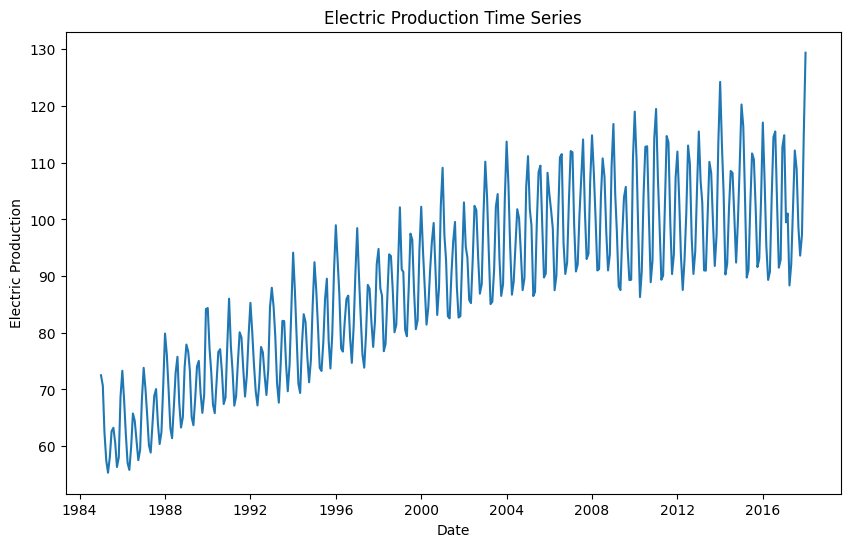

Epoch 1/10
252/252 - 3s - loss: 0.0480 - 3s/epoch - 13ms/step
Epoch 2/10
252/252 - 1s - loss: 0.0095 - 691ms/epoch - 3ms/step
Epoch 3/10
252/252 - 1s - loss: 0.0064 - 698ms/epoch - 3ms/step
Epoch 4/10
252/252 - 1s - loss: 0.0043 - 702ms/epoch - 3ms/step
Epoch 5/10
252/252 - 0s - loss: 0.0030 - 458ms/epoch - 2ms/step
Epoch 6/10
252/252 - 0s - loss: 0.0025 - 466ms/epoch - 2ms/step
Epoch 7/10
252/252 - 0s - loss: 0.0022 - 443ms/epoch - 2ms/step
Epoch 8/10
252/252 - 0s - loss: 0.0020 - 479ms/epoch - 2ms/step
Epoch 9/10
252/252 - 0s - loss: 0.0019 - 468ms/epoch - 2ms/step
Epoch 10/10
252/252 - 0s - loss: 0.0019 - 477ms/epoch - 2ms/step
4/4 [==============================] - 0s 3ms/step
Train Score: 3.13 RMSE
Test Score: 3.72 RMSE


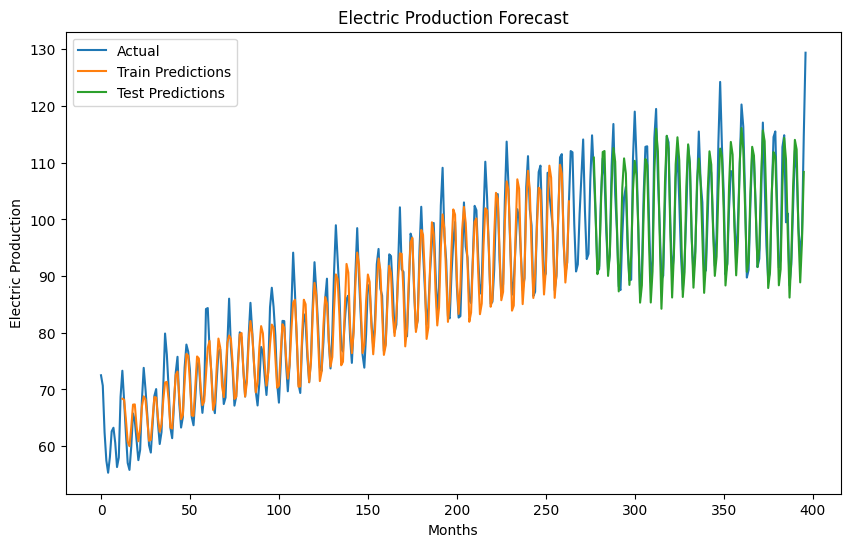

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Load the dataset
url = "https://raw.githubusercontent.com/ejgao/Time-Series-Datasets/master/Electric_Production.csv"
data = pd.read_csv(url)

# Convert the 'DATE' column to datetime
data['DATE'] = pd.to_datetime(data['DATE'])

# Set 'DATE' column as the index
data.set_index('DATE', inplace=True)

# Plot the dataset
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title('Electric Production Time Series')
plt.xlabel('Date')
plt.ylabel('Electric Production')
plt.show()

# Convert the dataset to numpy array
dataset = data.values
dataset = dataset.astype('float32')

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# Split the dataset into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

# Convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Reshape into X=t and Y=t+1
look_back = 12
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# Shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Plot baseline and predictions
plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title('Electric Production Forecast')
plt.xlabel('Months')
plt.ylabel('Electric Production')
plt.legend(['Actual', 'Train Predictions', 'Test Predictions'])
plt.show()


## 4 Design and implement a CNN for Image Classification a) Select a suitable image classification dataset (medical imaging, agricultural, etc.). b) Optimized with different hyperparameters including learning rate, filter size, no. of layers, optimizers, dropouts, etc.

## 5 Design and implement Deep Convolutional GAN to generate images of faces/digits from a set of given images.

## 6 Perform Sentiment Analysis in the network graph using RNN.

## 7 Import Data from different Sources such as (Excel, Sql Server, Oracle etc.) and load in targeted system.

## 8 Data Visualization from Extraction Transformation and Loading (ETL) Process

## 9 Perform the Extraction Transformation and Loading (ETL) process to construct the database in the Sql server / Power BI.

## 10 Data Analysis and Visualization using Advanced Excel.

## 11 Perform the data classification algorithm using any Classification algorithm

## 12 Perform the data clustering algorithm using any Clustering algorithm

https://github.com/sssingh/mnist-digit-generation-gan/blob/master/mnist_gan.ipynb

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 9912422/9912422 [00:00<00:00, 17527318.64it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 28881/28881 [00:00<00:00, 483074.23it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 1648877/1648877 [00:00<00:00, 4498828.37it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 3676998.41it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

2 <class 'list'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


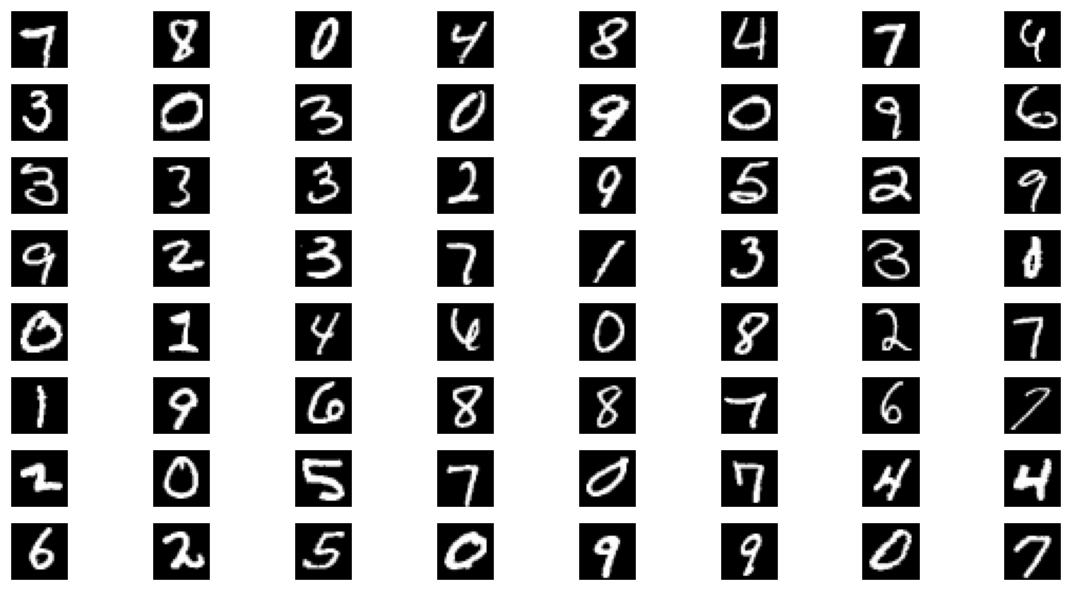

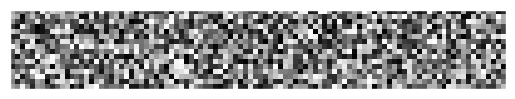

In [ ]:

import math
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor()])
train_ds = datasets.MNIST(root='./data',
                          train=True,
                          download=True,
                          transform=transform)

# Build dataloader
dl = DataLoader(dataset=train_ds,
                shuffle=True,
                batch_size=64)
# Examine a sample batch from the dataloader
image_batch = next(iter(dl))
print(len(image_batch), type(image_batch))
print(image_batch[0].shape)
print(image_batch[1].shape)


def display_images(images, n_cols=4, figsize=(12, 6)):
    """
    Utility function to display a collection of images in a grid

    Parameters
    ----------
    images: Tensor
            tensor of shape (batch_size, channel, height, width)
            containing images to be displayed
    n_cols: int
            number of columns in the grid

    Returns
    -------
    None
    """
    plt.style.use('ggplot')
    n_images = len(images)
    n_rows = math.ceil(n_images / n_cols)
    plt.figure(figsize=figsize)
    for idx in range(n_images):
        ax = plt.subplot(n_rows, n_cols, idx+1)
        image = images[idx]
        # make dims H x W x C
        image = image.permute(1, 2, 0)
        cmap = 'gray' if image.shape[2] == 1 else plt.cm.viridis
        ax.imshow(image, cmap=cmap)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.tight_layout()
    plt.show()

display_images(images=image_batch[0], n_cols=8)


class Discriminator(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.in_features = in_features
        self.out_features = out_features

        # Discriminator will down-sample the input producing a binary output
        self.fc1 = nn.Linear(in_features=in_features, out_features=128)
        self.leaky_relu1 = nn.LeakyReLU(negative_slope=0.2)
        self.fc2 = nn.Linear(in_features=128, out_features=64)
        self.leaky_relu2 = nn.LeakyReLU(negative_slope=0.2)
        self.fc3 = nn.Linear(in_features=64, out_features=32)
        self.leaky_relu3 = nn.LeakyReLU(negative_slope=0.2)
        self.fc4 = nn.Linear(in_features=32, out_features=out_features)
        self.dropout = nn.Dropout(0.3)


    def forward(self, x):
        # Rehape passed image batch
        batch_size = x.shape[0]
        x = x.view(batch_size, -1)
        # Feed forward
        x = self.fc1(x)
        x = self.leaky_relu1(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.leaky_relu2(x)
        x = self.dropout(x)
        x = self.fc3(x)
        x = self.leaky_relu3(x)
        x = self.dropout(x)
        logit_out = self.fc4(x)

        return logit_out

class Generator(nn.Module):
    def __init__(self, in_features, out_features):
        super(Generator, self).__init__()
        self.in_features = in_features
        self.out_features = out_features

        # Generator will up-sample the input producing input of size
        # suitable for feeding into discriminator
        self.fc1 = nn.Linear(in_features=in_features, out_features=32)
        self.relu1 = nn.LeakyReLU(negative_slope=0.2)
        self.fc2 = nn.Linear(in_features=32, out_features=64)
        self.relu2 = nn.LeakyReLU(negative_slope=0.2)
        self.fc3 = nn.Linear(in_features=64, out_features=128)
        self.relu3 = nn.LeakyReLU(negative_slope=0.2)
        self.fc4 = nn.Linear(in_features=128, out_features=out_features)
        self.dropout = nn.Dropout(0.3)
        self.tanh = nn.Tanh()


    def forward(self, x):
        # Feed forward
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.dropout(x)
        x = self.fc4(x)
        tanh_out = self.tanh(x)

        return tanh_out

def real_loss(predicted_outputs, loss_fn, device):
    """
    Function for calculating loss when samples are drawn from real dataset

    Parameters
    ----------
    predicted_outputs: Tensor
                       predicted logits

    Returns
    -------
    real_loss: int
    """
    batch_size = predicted_outputs.shape[0]
    # Targets are set to 1 here because we expect prediction to be
    # 1 (or near 1) since samples are drawn from real dataset
    targets = torch.ones(batch_size).to(device)
    real_loss = loss_fn(predicted_outputs.squeeze(), targets)

    return real_loss
def fake_loss(predicted_outputs, loss_fn, device):
    """
    Function for calculating loss when samples are generated fake samples

    Parameters
    ----------
    predicted_outputs: Tensor
                       predicted logits

    Returns
    -------
    fake_loss: int
    """
    batch_size = predicted_outputs.shape[0]
    # Targets are set to 0 here because we expect prediction to be
    # 0 (or near 0) since samples are generated fake samples
    targets = torch.zeros(batch_size).to(device)
    fake_loss = loss_fn(predicted_outputs.squeeze(), targets)

    return fake_loss


#Sample generation of latent vector
z_size = 100
z = np.random.uniform(-1, 1, size=(16, z_size))
plt.imshow(z, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
def train_minst_gan(d, g, d_optim, g_optim, loss_fn, dl, n_epochs, device, verbose=False):
    print(f'Training on [{device}]...')

    # Generate a batch (say 16) of latent image vector (z) of fixed size
    # (say 100 pix) to be as input to the Generator after each epoch of
    # training to generate a fake image. We'll visualise these fake images
    # to get a sense how generator improves as training progresses
    z_size = 100
    fixed_z = np.random.uniform(-1, 1, size=(16, z_size))
    fixed_z = torch.from_numpy(fixed_z).float().to(device)
    fixed_samples = []
    d_losses = []
    g_losses = []


    # Move discriminator and generator to available device
    d = d.to(device)
    g = g.to(device)

    for epoch in range(n_epochs):
        print(f'Epoch [{epoch+1}/{n_epochs}]:')
        # Switch the training mode on
        d.train()
        g.train()
        d_running_batch_loss = 0
        g_running_batch_loss = 0
        for curr_batch, (real_images, _) in enumerate(dl):
            # Move input batch to available device
            real_images = real_images.to(device)

            ## ----------------------------------------------------------------
            ## Train discriminator using real and then fake MNIST images,
            ## then compute the total-loss and back-propogate the total-loss
            ## ----------------------------------------------------------------

            # Reset gradients
            d_optim.zero_grad()

            # Real MNIST images
            # Convert real_images value range of 0 to 1 to -1 to 1
            # this is required because latter discriminator would be required
            # to consume generator's 'tanh' output which is of range -1 to 1
            real_images = (real_images * 2) - 1
            d_real_logits_out = d(real_images)
            d_real_loss = real_loss(d_real_logits_out, loss_fn, device)
            #d_real_loss = real_loss(d_real_logits_out, smooth=True)

            # Fake images
            with torch.no_grad():
                # Generate a batch of random latent vectors
                z = np.random.uniform(-1, 1, size=(dl.batch_size, z_size))
                z = torch.from_numpy(z).float().to(device)
                # Generate batch of fake images
                fake_images = g(z)
            # feed fake-images to discriminator and compute the
            # fake_loss (i.e. target label = 0)
            d_fake_logits_out = d(fake_images)
            d_fake_loss = fake_loss(d_fake_logits_out, loss_fn, device)
            #d_fake_loss = fake_loss(d_fake_logits_out)
            # Compute total discriminator loss
            d_loss = d_real_loss + d_fake_loss
            # Backpropogate through discriminator
            d_loss.backward()
            d_optim.step()
            # Save discriminator batch loss
            d_running_batch_loss += d_loss

            ## ----------------------------------------------------------------
            ## Train generator, compute the generator loss which is a measure
            ## of how successful the generator is in tricking the discriminator
            ## and finally back-propogate generator loss
            ## ----------------------------------------------------------------

            # Reset gradients
            g_optim.zero_grad()

            # Generate a batch of random latent vectors
            #z = torch.rand(size=(dl.batch_size, z_size)).to(device)
            z = np.random.uniform(-1, 1, size=(dl.batch_size, z_size))
            z = torch.from_numpy(z).float().to(device)
            # Generate a batch of fake images, feed them to discriminator
            # and compute the generator loss as real_loss
            # (i.e. target label = 1)
            fake_images = g(z)
            g_logits_out = d(fake_images)
            g_loss = real_loss(g_logits_out, loss_fn, device)
            #g_loss = real_loss(g_logits_out)
            # Backpropogate thorugh generator
            g_loss.backward()
            g_optim.step()
            # Save discriminator batch loss
            g_running_batch_loss += g_loss

            # Display training stats for every 200 batches
            if curr_batch % 400 == 0 and verbose:
                print(f'\tBatch [{curr_batch:>4}/{len(dl):>4}] - d_batch_loss: {d_loss.item():.6f}\tg_batch_loss: {g_loss.item():.6f}')

        # Compute epoch losses as total_batch_loss/number_of_batches
        d_epoch_loss = d_running_batch_loss.item()/len(dl)
        g_epoch_loss = g_running_batch_loss.item()/len(dl)
        d_losses.append(d_epoch_loss)
        g_losses.append(g_epoch_loss)

        # Display training stats for every 200 batches
        print(f'epoch_d_loss: {d_epoch_loss:.6f} \tepoch_g_loss: {g_epoch_loss:.6f}')

        # Generate fake images from fixed latent vector using the trained
        # generator so far and save images for latter viewing
        g.eval()
        fixed_samples.append(g(fixed_z).detach().cpu())

    # Finally write generated fake images from fixed latent vector to disk
    with open('fixed_samples.pkl', 'wb') as f:
        pkl.dump(fixed_samples, f)

    return d_losses, g_losses

# Instantiate Discriminator and Generator
d = Discriminator(in_features=784, out_features=1)
g = Generator(in_features=100, out_features=784)
#g = Generator(100, 32, 784)
print(d)
print()
print(g)

# Instantiate optimizers
d_optim = optim.Adam(d.parameters(), lr=0.002)
g_optim = optim.Adam(g.parameters(), lr=0.002)

# Instantiate the loss function
loss_fn = nn.BCEWithLogitsLoss()

# Setup device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

#Train
n_epochs = 15
d_losses, g_losses = train_minst_gan(d, g, d_optim, g_optim,
                                     loss_fn, dl, n_epochs, device,
                                     verbose=False)

Discriminator(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (leaky_relu1): LeakyReLU(negative_slope=0.2)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (leaky_relu2): LeakyReLU(negative_slope=0.2)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (leaky_relu3): LeakyReLU(negative_slope=0.2)
  (fc4): Linear(in_features=32, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

Generator(
  (fc1): Linear(in_features=100, out_features=32, bias=True)
  (relu1): LeakyReLU(negative_slope=0.2)
  (fc2): Linear(in_features=32, out_features=64, bias=True)
  (relu2): LeakyReLU(negative_slope=0.2)
  (fc3): Linear(in_features=64, out_features=128, bias=True)
  (relu3): LeakyReLU(negative_slope=0.2)
  (fc4): Linear(in_features=128, out_features=784, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (tanh): Tanh()
)
Training on [cuda]...
Epoch [1/15]:
epoch_d_loss: 1.134767 	epoch_g_loss: 1.796609
Epoch [2/15]:
epoch_d_loss: 1.319

In [ ]:
def show_generated_images(epoch, n_cols=8):
    # load saved images
    with open('fixed_samples.pkl', 'rb') as f:
        saved_data = pkl.load(f)
    epoch_data = saved_data[epoch-1]
    # re-scale back to 0-1
    epoch_data = (epoch_data + 1) / 2
    # re-shape to (batch_size, channel, height, width)
    batch_size, channel, height, width = len(epoch_data), 1, 28, 28
    image_batch = epoch_data.view(batch_size, channel, height, width)
    display_images(images=image_batch, n_cols=n_cols, figsize=(12, 4))

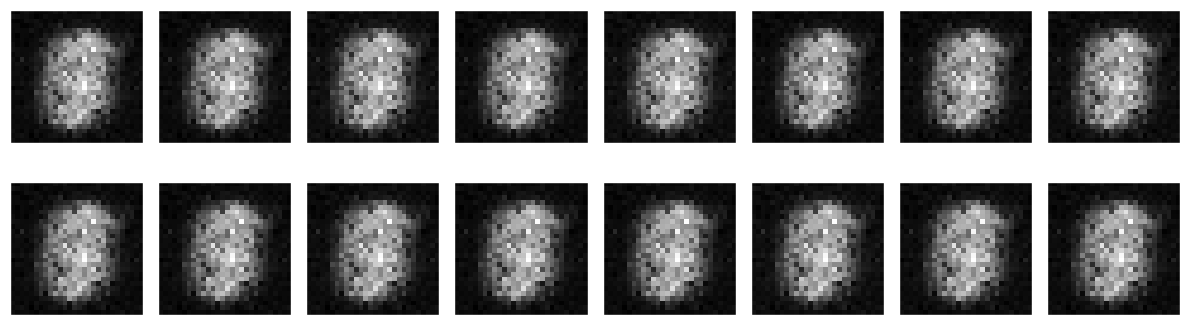

In [ ]:
show_generated_images(epoch=1, n_cols=8)

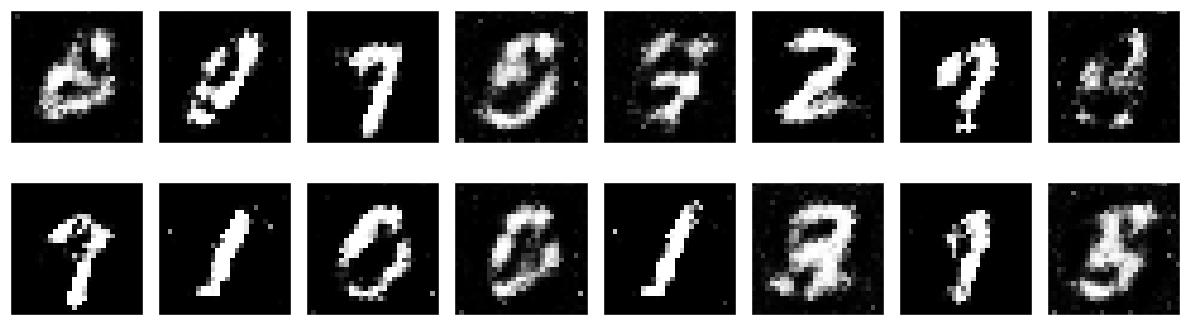

In [ ]:
show_generated_images(epoch=15, n_cols=8)

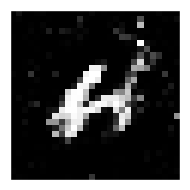

In [ ]:
# Bring generator back to cpu and set eval mode on
g.to('cpu')
g.eval()
# Feed a latent vecor of size 100 to trained generator and get a fake generated image back
z = np.random.uniform(-1, 1, size=(1, 100))
z = torch.from_numpy(z).float()
fake_image = g(z)
# Reshape and display
fake_image = fake_image.view(1, 1, 28, 28).detach()
display_images(fake_image, n_cols=1, figsize=(2, 2))